In [100]:
import pandas as pd
from bertopic import BERTopic
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer

In [82]:
nltk.download('stopwords', download_dir='C:/Users/ramirolobo/nltk_data')
nltk.download('punkt', download_dir='C:/Users/ramirolobo/nltk_data')
nltk.data.path.append('C:/Users/ramirolobo/nltk_data')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:/Users/ramirolobo/nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:/Users/ramirolobo/nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


In [107]:
#load texts
text_chunks = pd.read_csv("data/text_chunks.csv")
texts = text_chunks["text"].tolist()

In [140]:
#define stopwords
stop_words = set(stopwords.words('english'))
custom_stopwords = {
    "chapter", "book", "section", "article",
    "i", "ii", "iii", "iv", "v", "vi", "vii", "viii",
    "ix", "x", "xi", "xii", "xiii", "xiv", "xv", "xvi", "xvii",
    "xviii", "xix", "xx", "xxi", "xxii", "xxiii", "xxiv", "xxv",
    "xxvi", "xxvii", "xxviii", "xxix", "xxx", "xxxii", "xxxiii",
    "xxxiv", "xxxv", "xxxvi", "xxxvii", "xxxviii", "xxxix", "xl",
}
all_stopwords = stop_words.union(custom_stopwords)

#function to preprocess text
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r"[^a-z\s]", "", text)  # remove punctuation and numbers
    words = text.split()  # split by whitespace instead of word_tokenize
    filtered_words = [w for w in words if w not in all_stopwords]
    return " ".join(filtered_words)

In [141]:
#apply preprocessing
text_chunks["cleaned_text"] = text_chunks["text"].apply(preprocess_text)

In [142]:
text_chunks.head()

,Unnamed: 0,author,title,chunk,text,year,century,cleaned_text
0,1,Arrian,"The Anabasis of Alexander\r\nor, The History o...",0,the anabasis of alexander,130,2nd c. CE,anabasis alexander
1,2,Arrian,"The Anabasis of Alexander\r\nor, The History o...",1,the anabasis of alexander,130,2nd c. CE,anabasis alexander
2,3,Arrian,"The Anabasis of Alexander\r\nor, The History o...",2,or the history of the wars and conquests of ...,130,2nd c. CE,history wars conquests alexander great
3,4,Arrian,"The Anabasis of Alexander\r\nor, The History o...",3,literally translated with a commentary from th...,130,2nd c. CE,literally translated commentary greek arrian n...
4,5,Arrian,"The Anabasis of Alexander\r\nor, The History o...",4,e j chinnock ma llb london rector of dumfries...,130,2nd c. CE,e j chinnock llb london rector dumfries academy


In [146]:
#get vectorizer model to remove any residual stopwords
vectorizer_model = CountVectorizer(stop_words="english")

#fit BERTopic model
topic_model = BERTopic(
    #vectorizer_model=vectorizer_model,
    #calculate_probabilities=True,
    #verbose=True,
    #nr_topics="auto",  # Automatically determine the number of topics
    #language="english"  # Specify the language for stopwords
)

cleaned_texts = text_chunks["cleaned_text"].dropna().tolist()
topics, probs = topic_model.fit_transform(cleaned_texts)

c:\Users\ramirolobo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

c:\Users\ramirolobo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

c:\Users\ramirolobo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

c:\Users\ramirolobo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



In [147]:
topics = topic_model.get_topic_info()
#topics.to_csv("data/topics.csv", index=False)

In [148]:
# top 15 topics
topics.head(15)

,Topic,Count,Name,Representation,Representative_Docs
0,-1,9583,-1_army_war_one_may,"[army, war, one, may, would, enemy, also, upon...",[according relations less always degree regard...
1,0,4458,0_english_french_england_france,"[english, french, england, france, ships, flee...",[english centre rear plate accept english esti...
2,1,1526,1_caesar_gaul_caesars_people,"[caesar, gaul, caesars, people, legions, ancie...",[assaulting gaul evidence come without invited...
3,2,535,2_athenians_lacedaemonians_athens_lacedaemon,"[athenians, lacedaemonians, athens, lacedaemon...",[lacedaemonians may prison athens elsewhere at...
4,3,516,3_sun_wu_tz_chi,"[sun, wu, tz, chi, yu, tsao, chang, chinese, c...",[return elder sun tz mentioned two passages sh...
5,4,414,4_ships_sailed_athenians_vessels,"[ships, sailed, athenians, vessels, athenian, ...",[turn sailed miletus hundred eight ships wishi...
6,5,339,5_river_indus_called_name,"[river, indus, called, name, rivers, hebrew, e...",[maeotis sea called hyrcanian reality gulf gre...
7,6,269,6_maritza_bardylis_crateas_ariaspians,"[maritza, bardylis, crateas, ariaspians, music...",[peithagras peithn son sosicles peithon son ag...
8,7,228,7_macedonians_alexander_phalanx_cavalry,"[macedonians, alexander, phalanx, cavalry, cit...",[macedonians besides admetus proved valiant ma...
9,8,195,8_divisions_battalions_columns_column,"[divisions, battalions, columns, column, deplo...",[whole armies deployed skirmishers still neces...


Topics seems to primarily identify authors rather than common themes between them.

In [127]:
topic_model.get_representative_docs(topics)

{-1: ['army sent attius away safety three first days caesar employed fortifying camp strong works bringing corn neighbouring free towns waiting rest forces within three days eighth legion came twentytwo cohorts new levies gaul three hundred',
  'upon objects case enemy two different objects one part exclude therefore force may applicable one may serve therefore one two belligerents determined seek great decision arms high probability success',
  'army one days rest next day sent peithon demetrius cavalry general back river command troops giving addition many battalions lightarmed infantry sufficient enterprise instructions go along bank river met fled'],
 0: ['advantage wind english day fortyfour ships action dutch eighty many english said larger two fleets passed opposite tacks english windward tromp rear seeing dutch order battle badly formed ships two three lines overlapping',
  'time arrived strong english squadron six shipsoftheline admiral hughes absence similar french force gave

In [149]:
#topics over time
timestamps = text_chunks['year'].tolist()
topics_over_time = topic_model.topics_over_time(texts, timestamps=timestamps, nr_bins=7, global_tuning=False)

In [150]:
#visualize topics over time
topics_over_time_vis = topic_model.visualize_topics_over_time(topics_over_time)
topics_over_time_vis


In [ ]:
#another topic model with fixed number of topics
topic_model_2 = BERTopic(nr_topics=50)
topics_2, probs_2 = topic_model_2.fit_transform(cleaned_texts)

c:\Users\ramirolobo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

c:\Users\ramirolobo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

c:\Users\ramirolobo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

c:\Users\ramirolobo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



In [ ]:
#not meaningful topics
topics_2 = topic_model_2.get_topic_info()
topics_2.head(15)

,Topic,Count,Name,Representation,Representative_Docs
0,-1,10,-1_tttttttttttttttttttttttttttttttttttttttt_co...,"[tttttttttttttttttttttttttttttttttttttttt, con...",[conquest difficulties national wars wars inst...
1,0,155,0_disastrous_notice__,"[disastrous, notice, , , , , , , , ]","[, notice, disastrous]"
2,1,4448,1_french_english_ships_sea,"[french, english, ships, sea, england, france,...",[ship first last might brought action beginnin...
3,2,17122,2_army_one_upon_would,"[army, one, upon, would, war, men, enemy, may,...",[danger could save baggage whole army cohorts ...


In [162]:
#add topics to text_chunks df
document_info = topic_model.get_document_info(cleaned_texts)
text_chunks['topic'] = document_info['Topic']

In [201]:
topic_by_author = (
    text_chunks.groupby("author")["topic"]
    .value_counts()
    .unstack(fill_value=0)
)

#topics with more than n occurrences across all chunks
n = 100
top_topics = topics[topics["Count"] > n]["Topic"].tolist()
top_topics = top_topics[1:]  # exclude noisy topic -1

# convert to proportions
topic_by_author_norm = topic_by_author.div(topic_by_author.sum(axis=1), axis=0)

top_topics_by_author_norm = topic_by_author_norm.loc[:, top_topics]  # get top topics

In [202]:
top_topics_by_author_norm.head(10)

topic,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
author,,,,,,,,,,,,,,,,,,
Arrian,0.018177,0.008953,0.007325,0.002713,0.004612,0.082474,0.069723,0.058871,0.000543,0.000543,0.022518,0.040423,0.000543,0.000271,0.011666,0.003798,0.001085,0.000543
Caesar,0.045943,0.470837,0.000652,0.003258,0.000652,0.007494,0.000326,0.000652,0.000000,0.000978,0.000652,0.000000,0.000000,0.000326,0.017269,0.025415,0.000000,0.004236
Clausewitz,0.013730,0.001373,0.000000,0.000458,0.000000,0.000458,0.000000,0.000458,0.002288,0.035698,0.000458,0.000458,0.058581,0.020137,0.000000,0.000458,0.003661,0.002288
Jomini,0.074020,0.007607,0.000000,0.001463,0.000585,0.000585,0.002048,0.000585,0.052662,0.021650,0.008777,0.000000,0.002048,0.019310,0.000000,0.000585,0.027209,0.003511
Mahan,0.887430,0.000938,0.000000,0.002111,0.000000,0.000235,0.000469,0.000235,0.000235,0.003283,0.001642,0.000235,0.001173,0.001173,0.000000,0.000235,0.000235,0.003049
Sun Tzu,0.011095,0.007396,0.000740,0.355030,0.000740,0.000000,0.000740,0.000000,0.003698,0.012574,0.000740,0.000000,0.000740,0.018491,0.005178,0.002219,0.000000,0.001479
Thucydides,0.044669,0.001329,0.134273,0.000266,0.104228,0.002127,0.000266,0.001329,0.000532,0.001064,0.008508,0.000000,0.000798,0.000266,0.010635,0.002393,0.000000,0.014624


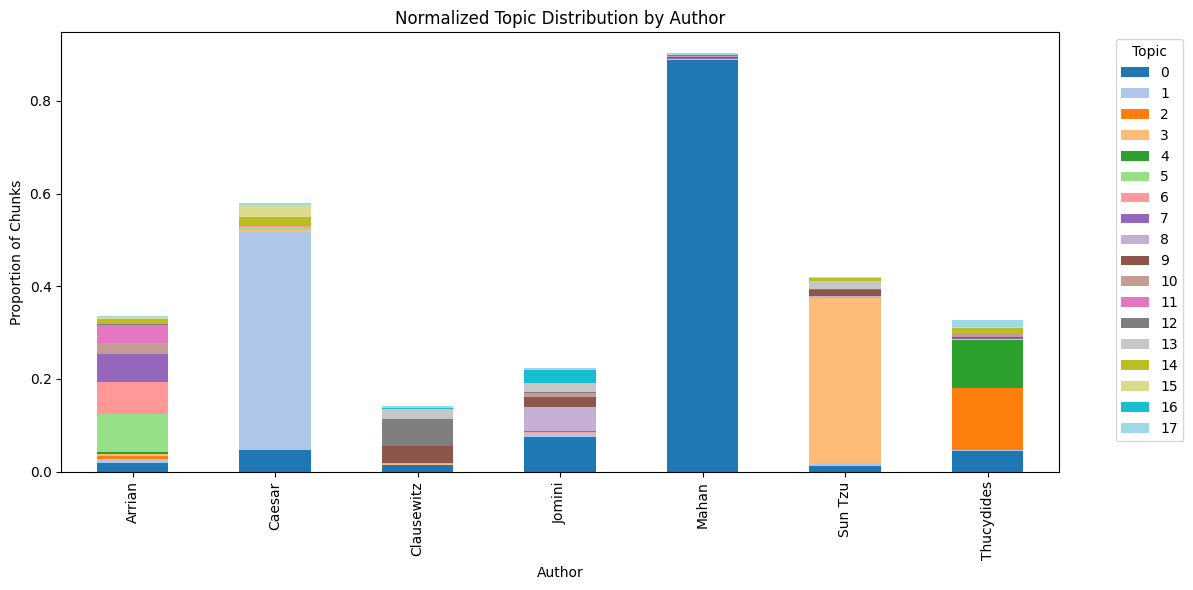

In [203]:
import matplotlib.pyplot as plt

top_topics_by_author_norm.plot(kind='bar', stacked=True, colormap='tab20', figsize=(12, 6))
plt.title("Normalized Topic Distribution by Author")
plt.xlabel("Author")
plt.ylabel("Proportion of Chunks")
plt.legend(title="Topic", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Hierarchical Topic Modeling

In [204]:
#hierarchical topic modeling
hierarchical_topics = topic_model.hierarchical_topics(cleaned_texts)

100%|██████████| 101/101 [00:00<00:00, 337.54it/s]


In [205]:
#visualize topic hierarchy
topic_model.visualize_hierarchy(hierarchical_topics=hierarchical_topics)


In [206]:
hierarchy_tree = topic_model.get_topic_tree(hierarchical_topics)
print(hierarchy_tree)

.
├─may_sun_lines_must_one
│    ├─may_sun_must_wu_one
│    │    ├─object_theory_therefore_may_art
│    │    │    ├─art_war_science_arts_les
│    │    │    │    ├─art_les_war_logistics_summary
│    │    │    │    │    ├─■──art_logistics_moving_armies_map ── Topic: 99
│    │    │    │    │    └─■──art_les_war_summary_military ── Topic: 44
│    │    │    │    └─■──art_science_arts_war_handicraft ── Topic: 89
│    │    │    └─object_therefore_may_theory_must
│    │    │         ├─object_theory_therefore_means_destruction
│    │    │         │    ├─theory_mind_general_military_generals
│    │    │         │    │    ├─■──mind_feelings_understanding_feeling_boldness ── Topic: 24
│    │    │         │    │    └─theory_military_general_generals_spirit
│    │    │         │    │         ├─■──military_generals_general_spirit_virtue ── Topic: 9
│    │    │         │    │         └─■──theory_historical_theoretical_things_truth ── Topic: 12
│    │    │         │    └─object_destruction_combat_politi